# Entrega 1
Segue primeira atividade para entrega no portal

Escolha uma base de dados no https://www.kaggle.com/datasets

0) Se familiarize com sua base, não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).

1) Realize sumarizacoes. Veja qual tipo de gráfico é útil para sua análise se barras, linha ou pizza

2) Faça análises estatísticas
Apresente o histograma
Calcule os quartis
Apresente o boxplot

Não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).

Para esta tarefa, escolhi a base de dados "Most Subscribed 1000 YouTube Channels" disponível no Kaggle.

https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels

# Carregando a base de dados:
Para começar, vou carregar a base de dados usando a biblioteca pandas e verificar suas primeiras linhas usando a função head().

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv("topSubscribed.csv")
df = df.replace(',', '', regex=True)
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012


# Verificando a estrutura da base de dados:
Agora, vou verificar as informações sobre a estrutura da base de dados, como o número de linhas e colunas, o tipo de dados em cada coluna e a presença de valores nulos.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [3]:
df = df.astype({'Subscribers':'int64', 'Video Views':'int64', 'Video Views':'int64'})

# Verificando estatísticas básicas:
Para ter uma ideia das estatísticas básicas dos dados, como média, desvio padrão, mínimo e máximo, vou usar a função describe().

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1000.00,500.50,288.82,1.00,250.75,500.50,750.25,1000.00
Subscribers,1000.00,21581400.00,16625563.55,11400000.00,13400000.00,16600000.00,23200000.00,234000000.00
Video Views,1000.00,9994912409.73,13005457456.50,0.00,3871469970.25,6723360159.00,12230520916.75,212900271553.00
Started,1000.00,2012.59,4.11,1970.00,2010.00,2013.00,2015.00,2021.00


# Started em 1970??

In [5]:
df[df['Started']==1970]

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
99,100,YouTube,35200000,2980922779,620,News & Politics,1970


Sendo o próprio canal do youtube, coloquei sua data de fundação 2005.

In [6]:
df.loc[df["Started"] == 1970, "Started"] = 2005

# Zero Video Views??

In [7]:
df[df['Video Views']==0]

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
5,6,Music,118000000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
9,10,Gaming,93300000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
17,18,Sports,75100000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
91,92,News,36300000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
154,155,Popular on YouTube,29300000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
357,358,Minecraft - Topic,19500000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
550,551,Live,15700000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2015
971,972,Machinima,11600000,0,0,Film & Animation,2006


In [8]:
# Renomeando a categoria http
df.loc[df["Category"] == 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels', "Category"] = 'Sem Cartegoria'

Vou deixar por hora essas linhas, pelo quantidade relevante de Subscribers. Talvez outros canais estejam dentro desses "Canal Categoria"

# Plots

In [9]:
def plot_histplot(df, x, bins, titulo, xlabel, ylabel, kde=False):
    # Define o tamanho da figura
    plt.figure(figsize=(13, 3))

    # Plota o histograma usando a biblioteca Seaborn
    sns.histplot(data=df, x=x, bins=bins, linewidth=1.2, kde = kde)

    # Adiciona um título ao gráfico
    plt.title(titulo, fontsize=16)

    # Adiciona um rótulo ao eixo x e y
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=90)

    # Adiciona grades ao fundo do gráfico
    plt.grid(alpha=0.2)

    # Ajusta o tamanho das fontes das legendas
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Remove os eixos superior e direito
    sns.despine()

    # Mostra o gráfico
    return plt.show()

In [10]:
def plot_barplot(df, x, y, titulo, xlabel, ylabel):
    # Define o tamanho da figura
    plt.figure(figsize=(13, 3))

    # Plota o histograma usando a biblioteca Seaborn
    sns.barplot(data = df, x=x, y=y, palette="magma")
    # Adiciona um título ao gráfico
    plt.title(titulo, fontsize=16)

    # Adiciona um rótulo ao eixo x e y
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Adiciona grades ao fundo do gráfico
    plt.grid(alpha=0.2)

    # Ajusta o tamanho das fontes das legendas
    plt.xticks(fontsize=12)
    plt.xticks(rotation=90)
    plt.yticks(fontsize=12)

    # Remove os eixos superior e direito
    sns.despine()

    # Mostra o gráfico
    return plt.show()

In [11]:
def plot_boxplot(df, x, y, titulo, xlabel, ylabel):
    # Define o tamanho da figura
    plt.figure(figsize=(13, 3))

    # Plota o histograma usando a biblioteca Seaborn
    sns.boxplot(data = df, x=x, y=y, palette="magma")
    # Adiciona um título ao gráfico
    plt.title(titulo, fontsize=16)

    # Adiciona um rótulo ao eixo x e y
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Adiciona grades ao fundo do gráfico
    plt.grid(alpha=0.2)

    # Ajusta o tamanho das fontes das legendas
    plt.xticks(fontsize=12)
    plt.xticks(rotation=90)
    plt.yticks(fontsize=12)

    # Remove os eixos superior e direito
    sns.despine()

    # Mostra o gráfico
    return plt.show()

## Contagem de Categorias

In [12]:
df.value_counts('Category')

Category
Entertainment            238
Music                    217
People & Blogs           132
Gaming                    94
Comedy                    68
Film & Animation          50
Education                 45
Howto & Style             43
Sem Cartegoria            30
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Nonprofits & Activism      2
Trailers                   2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
dtype: int64

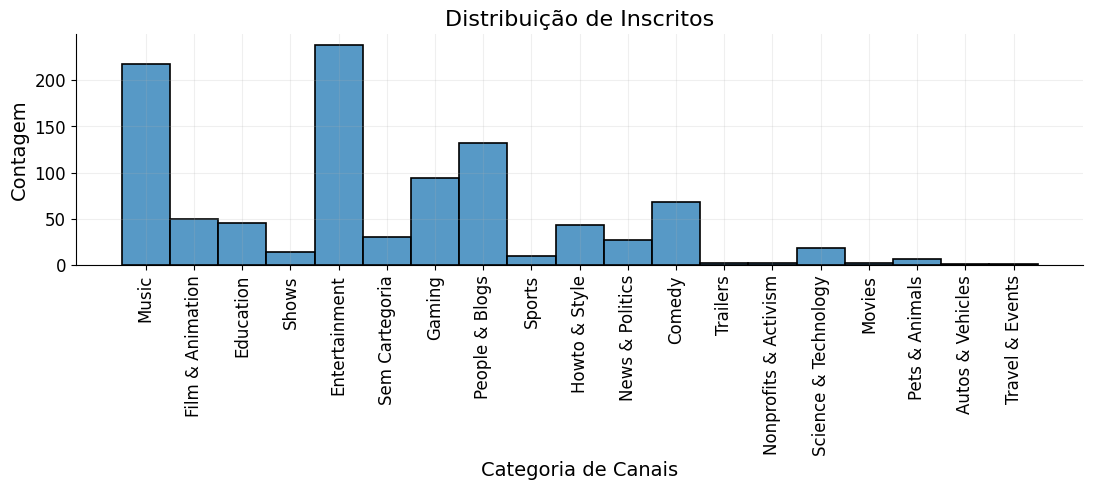

In [13]:
plot_histplot(df, 'Category', 100, 'Distribuição de Inscritos', 'Categoria de Canais', 'Contagem')

## Distribuição de Inscritos

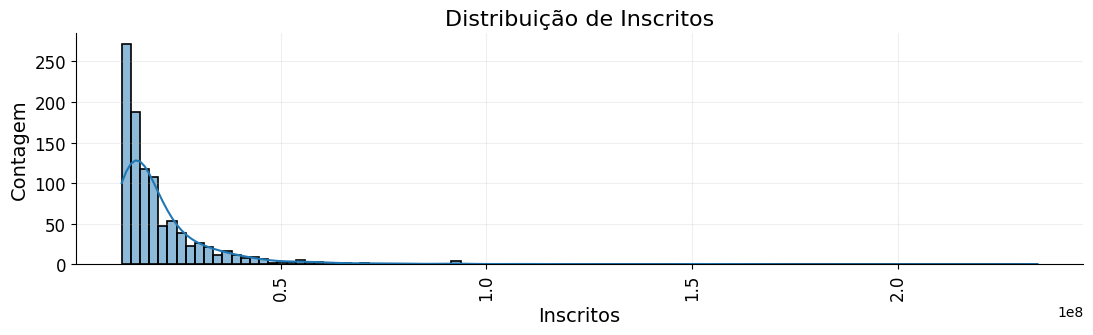

In [14]:
plot_histplot(df, 'Subscribers', 100, 'Distribuição de Inscritos', 'Inscritos', 'Contagem', True)# Define o tamanho da figura

## Contagem de Inscritos por Categoria

In [15]:
df_cat = df.groupby('Category').sum()
df_cat.drop(columns=['Rank', 'Started'], inplace=True)
df_cat.reset_index(inplace=True)
df_cat = df_cat.sort_values(by = 'Subscribers', ascending=False).reset_index(drop=True)
df_cat

C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_19900\310806937.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cat = df.groupby('Category').sum()


,Category,Subscribers,Video Views
0,Music,5224800000,3058929450985
1,Entertainment,4768200000,2218980613268
2,People & Blogs,2558500000,1108132436989
3,Gaming,1873900000,671374062722
4,Film & Animation,1275200000,518043392749
5,Comedy,1256400000,424592260530
6,Education,1133600000,638114991185
7,Sem Cartegoria,793400000,179830796038
8,Howto & Style,782300000,195253359938
9,News & Politics,519300000,252717799570


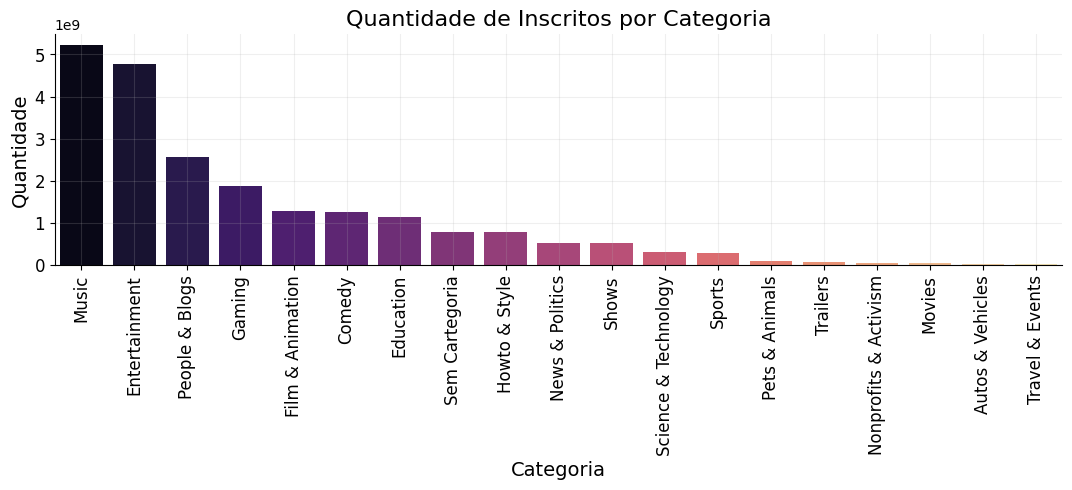

In [16]:
plot_barplot(df_cat, 'Category', 'Subscribers', 'Quantidade de Inscritos por Categoria', 'Categoria', 'Quantidade')

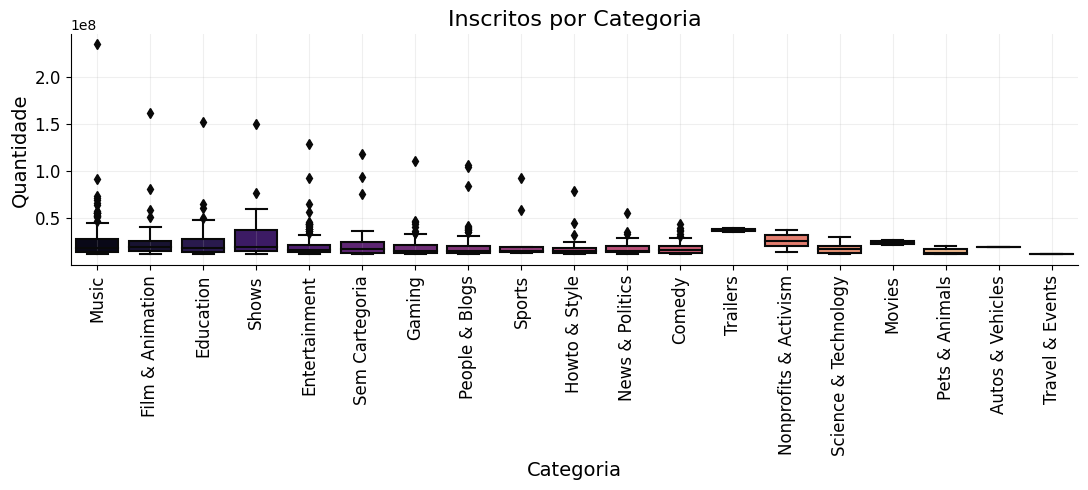

In [17]:
plot_boxplot(df, "Category", "Subscribers", 'Inscritos por Categoria', 'Categoria', 'Quantidade')

## Boxplot distribuição de inscritos

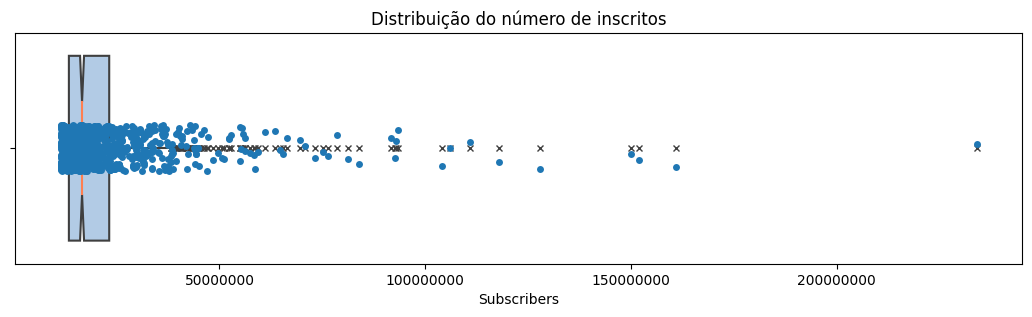

In [18]:
plt.figure(figsize=(13,3))
plt.title("Distribuição do número de inscritos")
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df['Subscribers'], notch=True, showcaps=False, flierprops={"marker": "x"}, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"})
sns.stripplot(x=df['Subscribers'])
plt.show()

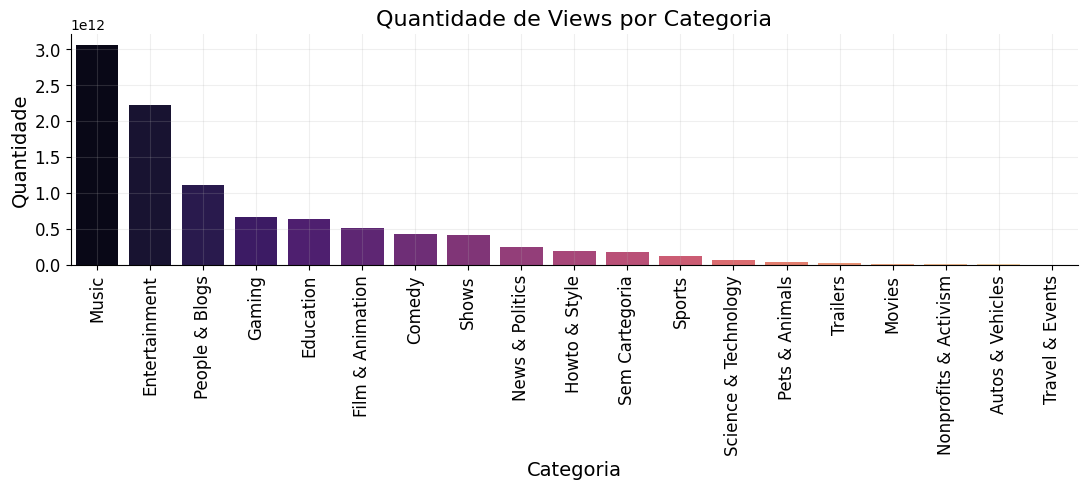

In [19]:
df_cat = df_cat.sort_values(by = 'Video Views', ascending=False)

plot_barplot(df_cat, 'Category', 'Video Views', 'Quantidade de Views por Categoria', 'Categoria', 'Quantidade')

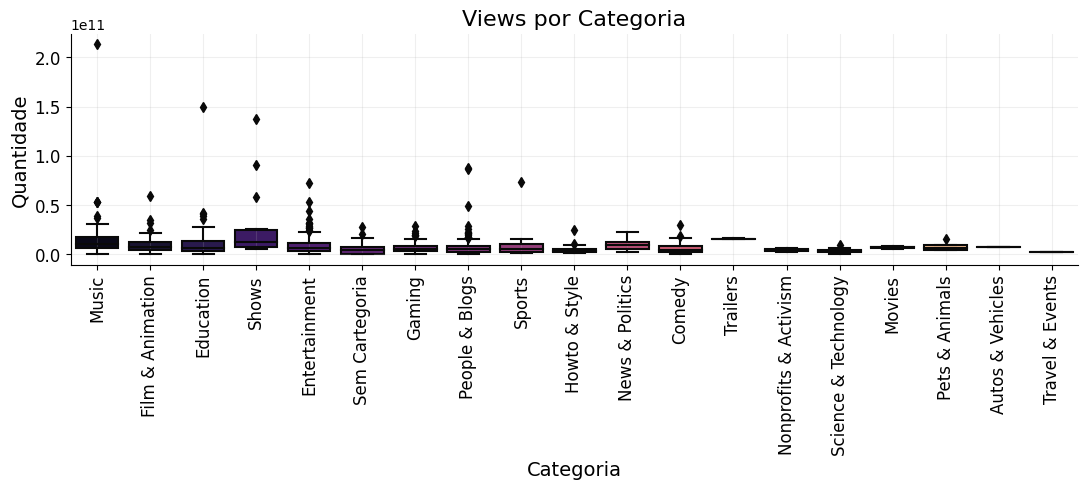

In [20]:
plot_boxplot(df, "Category", "Video Views", 'Views por Categoria', 'Categoria', 'Quantidade')

## Distribuição de canais pelos anos

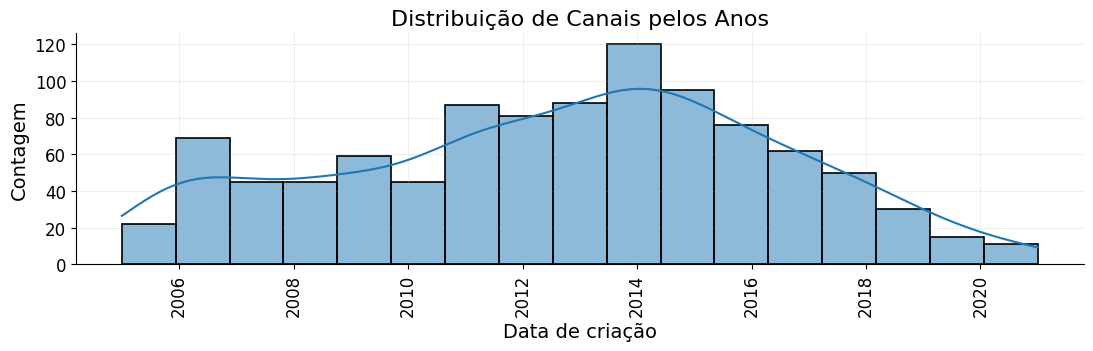

In [21]:
plot_histplot(df, 'Started', len(df.Started.unique()), 'Distribuição de Canais pelos Anos', 'Data de criação', 'Contagem', True)

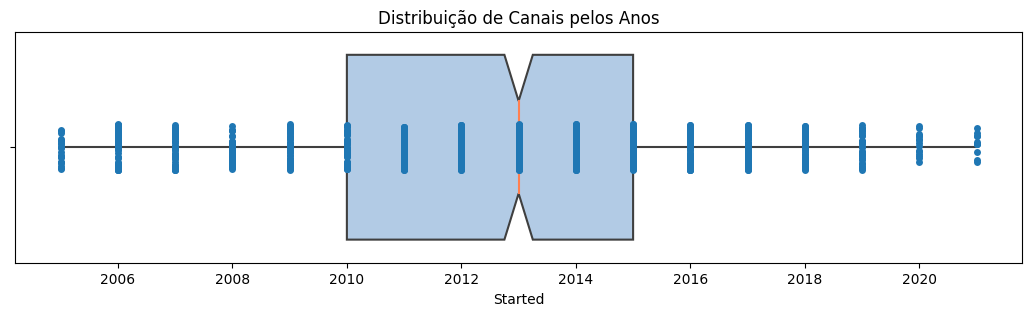

In [22]:
plt.figure(figsize=(13, 3))
plt.title("Distribuição de Canais pelos Anos")
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df['Started'], notch=True, showcaps=False, flierprops={"marker": "x"}, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"})
sns.stripplot(x=df['Started'])
plt.show()

Canais criados entre 2013 e 2015 foram os que mais se cresceram. Esse período também representa 25% da criação dos canais top1000.

Algumas análises/conclusões:

- A base de dados possui 1000 linhas e 7 colunas.
- Outliers